### Regularized Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

In [215]:
train_data = scio.loadmat("./ex5data1.mat")
# print(train_data)
X = train_data['X']
Y = train_data['y']
Xtest = train_data['Xtest']
Ytest = train_data['ytest']
Xval = train_data['Xval']
Yval = train_data['yval']

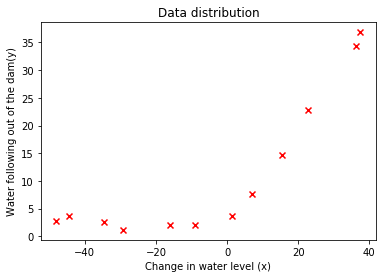

In [216]:
# Plot the training set
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Data distribution')  
plt.xlabel('Change in water level (x)')   
plt.ylabel('Water following out of the dam(y)') 

plt.scatter(X, Y, color='red', marker='x')

plt.show()

In [338]:
def hypothesis(X, theta):
    return np.matmul(X, theta)
  
def compute_loss_reg(X, Y, theta, lamb=1):
    H = hypothesis(X, theta)
    return (np.sum((H - Y)**2) + lamb * np.sum(theta[1:] ** 2)) / (2 * len(X))
      
def train(Xtrain, Ytrain, epoch, lamb, learning_rate):
    theta = np.ones([Xtrain.shape[1], 1])
    for i in range(epoch):
        H = hypothesis(Xtrain, theta)
        delta = np.matmul((H - Ytrain).T, Xtrain) / len(Xtrain)
#         print(delta.shape, theta.shape)
        delta[:,1:] += lamb * theta[1:].T / len(Xtrain)
#         delta[0] -= lamb * (theta.T)[0] / len(Xtrain)
        theta -= learning_rate * delta.T
    return theta

# Training
Xtrain = np.c_[np.ones(len(X)), X]
theta = train(Xtrain, Y, epoch=4000, lamb=1, learning_rate=0.002)
loss = compute_loss_reg(Xtrain, Y, theta, lamb=1)

print(loss)

22.379554604363047


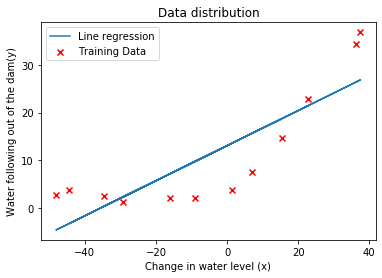

In [272]:
# Plot the model
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
ax1.set_title('Data distribution')  
plt.xlabel('Change in water level (x)')   
plt.ylabel('Water following out of the dam(y)') 

plt.scatter(X, Y, color='red', marker='x')
plt.plot(X, hypothesis(Xtrain, theta))
plt.legend(('Line regression','Training Data'), loc='best')

plt.show()

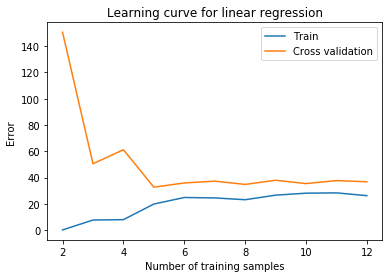

In [273]:
def plot_learning_curve(X, error_train, error_val):
    fig = plt.figure()  
    ax1 = fig.add_subplot(1, 1, 1)  

    ax1.set_title('Learning curve for linear regression')  
    plt.xlabel('Number of training samples')   
    plt.ylabel('Error ') 

    plt.plot(range(2, len(X) + 1), error_train)
    plt.plot(range(2, len(X) + 1), error_val)
    plt.legend(('Train','Cross validation'), loc='best')

    plt.show()

# Plot learning curve for training and validation set
error_train = []
error_val = []
for i in range(2, len(X) + 1):
    Xtrain = np.c_[np.ones(len(X[:i])), X[:i]]
    Ytrain = Y[:i]
    theta = train(Xtrain, Ytrain, epoch=1500, lamb=1, learning_rate=0.001)
    error_train.append(compute_loss_reg(Xtrain, Ytrain, theta, lamb=0))
    error_val.append(compute_loss_reg(np.c_[np.ones(len(Xval)), Xval], Yval, theta, lamb=0))

# print(error_train)
# print(error_val)

plot_learning_curve(X, error_train, error_val)

###  Polynomial regression

In [372]:
def feature_poly(X, degree):
    for i in range(2, degree + 1):
        X = np.c_[X, X[:,0]**i]
    return X

def feature_norm(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def create_feature(X):
    Xtrain = feature_poly(X, 8)
    Xtrain = feature_norm(Xtrain)
    return np.c_[np.ones(len(Xtrain)), Xtrain]

def plot_poly(X, Y, theta):
    fig = plt.figure()  
    ax1 = fig.add_subplot(1, 1, 1)  

    ax1.set_title('Data distribution')  
    plt.xlabel('Change in water level (x)')   
    plt.ylabel('Water following out of the dam(y)') 

    plt.scatter(X, Y, color='red', marker='x')
    x = np.arange(-80, 80, 0.5).reshape(-1, 1)

    plt.plot(x, hypothesis(create_feature(x), theta))
    plt.legend(('Line regression','Training Data'), loc='best')

    plt.show()

def cal_poly_by_lambda(X, Y, lamb, epoch=40000):
    Xtrain = create_feature(X)
    theta = train(Xtrain, Y, epoch, lamb=lamb, learning_rate=0.004)
#     print(theta, lamb)
#     loss = compute_loss_reg(Xtrain, Y, theta, lamb)
#     print('loss:', loss)
    return theta

def plot_poly_by_lambda(X, Y, lamb):
    theta = cal_poly_by_lambda(X, Y, lamb)
    plot_poly(X, Y, theta)
    
def cal_learning_curve_by_lamba(X, Y, lamb):
    error_train = []
    error_val = []
    for i in range(2, len(X) + 1):
        theta = cal_poly_by_lambda(X[:i], Y[:i], lamb, epoch=1000)
        error_train.append(compute_loss_reg(create_feature(X[:i]), Y[:i], theta, lamb))
        error_val.append(compute_loss_reg(create_feature(Xval), Yval, theta, lamb))
    return error_train, error_val
    
def plot_learning_curve_by_lamba(X, Y, lamb):
    error_train, error_val = cal_learning_curve_by_lamba(X, Y, lamb)
    plot_learning_curve(X, error_train, error_val)

#### Lambda = 0

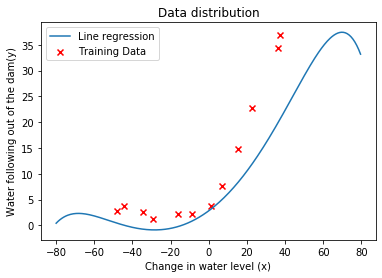

In [343]:
# Overfit
plot_poly_by_lambda(X, Y, lamb=0)

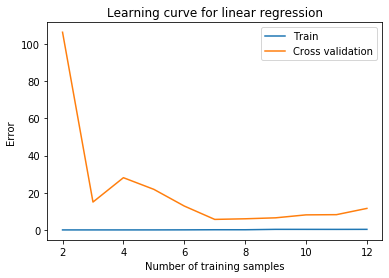

In [344]:
# Training loss is always low, but validation loss is higher
plot_learning_curve_by_lamba(X, Y, lamb=0)

#### Lambda = 1

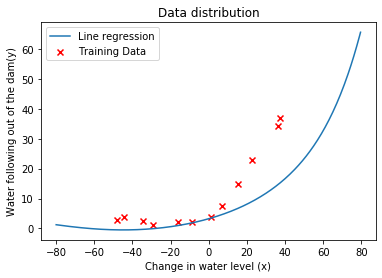

In [345]:
# It's good
plot_poly_by_lambda(X, Y, lamb=1)

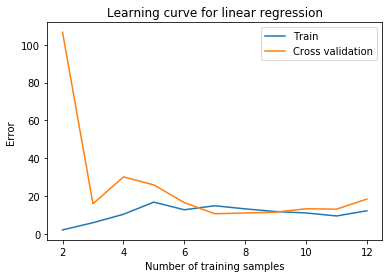

In [319]:
# Loss in both training set and validation set are almost the same
plot_learning_curve_by_lamba(X, Y, lamb=1)

#### Lambda = 100

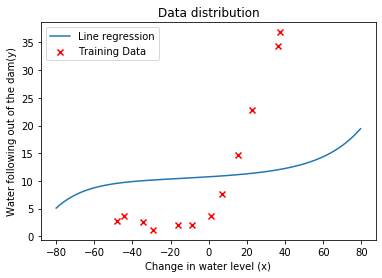

In [346]:
# High bias, cannot fit
plot_poly_by_lambda(X, Y, lamb=100)

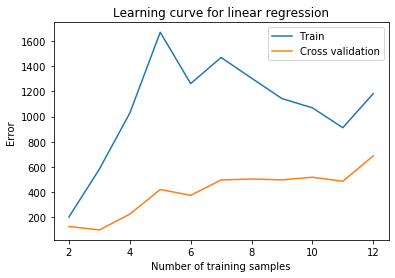

In [321]:
# Loss are high
plot_learning_curve_by_lamba(X, Y, lamb=100)

#### Different lambda

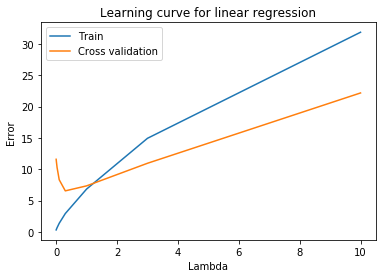

In [358]:
# Plot the loss for different lambda
lambs = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
error_train = []
error_val = []
for lamb in lambs:
    theta = cal_poly_by_lambda(X, Y, lamb)
    error_train.append(compute_loss_reg(create_feature(X), Y, theta, lamb))
    error_val.append(compute_loss_reg(create_feature(Xval), Yval, theta, lamb))
    
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  

ax1.set_title('Learning curve for linear regression')  
plt.xlabel('Lambda')   
plt.ylabel('Error ') 

plt.plot(lambs, error_train)
plt.plot(lambs, error_val)
plt.legend(('Train','Cross validation'), loc='best')

plt.show()

#### Computing test set error

In [365]:
# Lambda = 0.3 should be the best one
lamb = 0.3
theta = cal_poly_by_lambda(X, Y, lamb)
loss = compute_loss_reg(create_feature(Xtest), Ytest, theta, lamb)
print(loss)

8.914491800391385


#### Plotting learning curves with randomly selected examples

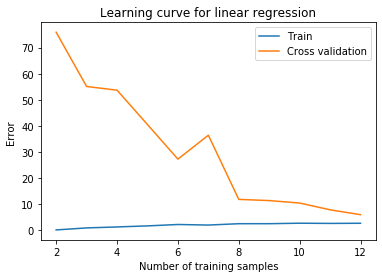

In [376]:
def cal_learning_curve_by_lamba_randomly(X, Y, lamb):
    error_train = []
    error_val = []
    for i in range(2, len(X) + 1):
        losses_train = []
        losses_val = []
        for _ in range(50):
            indexes = np.random.permutation(len(X))[:i]
            theta = cal_poly_by_lambda(X[indexes], Y[indexes], lamb, epoch=1000)
            losses_train.append(compute_loss_reg(create_feature(X[indexes]), Y[indexes], theta, lamb))
            losses_val.append(compute_loss_reg(create_feature(Xval[indexes]), Yval[indexes], theta, lamb))
        error_train.append(np.mean(np.array(losses_train)))
        error_val.append(np.mean(np.array(losses_val)))
    return error_train, error_val

error_train, error_val = cal_learning_curve_by_lamba_randomly(X, Y, lamb=0.01)
plot_learning_curve(X, error_train, error_val)